# Jupyter Notebooks - Astronomy - Calculations

This build contains several demonstrations of using Jupyter notebooks to work with and display astronomical data.

This notebook demonstrates a range of astronomical calculations.

From the *Cell* menu, select *Run All*.

## Python Packages

A wide range of Python packages exist that faclitate working with astronomical datasets and rendering outputs directly in Jupyter notebooks.

In [1]:
import matplotlib
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

## `pyephem`

[`pyephem`](http://rhodesmill.org/pyephem/) is a Pyhton package that supports basic astronomical computations.

> Given a date and location on the Earth’s surface, it can compute the positions of the Sun and Moon, of the planets and their moons, and of any asteroids, comets, or earth satellites whose orbital elements the user can provide. Additional functions are provided to compute the angular separation between two objects in the sky, to determine the constellation in which an object lies, and to find the times at which an object rises, transits, and sets on a particular day.

Examples based on: http://nbviewer.jupyter.org/url/www.sc.eso.org/~bdias/pycoffee/codes/20160908/pyephemexamples.ipynb

In [2]:
%matplotlib inline
import ephem
import numpy as np

#Define an observer
obs = ephem.city('London')

#Get current time
ephem.localtime(obs.date).strftime("%Y-%m-%d %H:%M")

'2017-12-03 10:14'

In [3]:
#Next sunset and sunrise
sol = ephem.Sun()
obs.horizon = '-18'
sol.compute(obs)
print(obs.next_setting(sol, use_center=True))
print(obs.next_rising(sol, use_center=True))

2017/12/3 17:55:48
2017/12/4 05:45:42


In [4]:
obs.horizon = '10'#To take into account the cordillera, but this could also be your observing limits
obs.next_rising(sol), obs.next_setting(sol)

(43071.89272680023, 43071.094994050094)

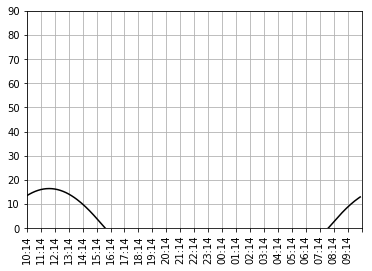

In [5]:
#Plotting the altitude over 24h
def plotAltitude(obs, obj):
    resolution = 0.1
    datelist = [ephem.date(obs.date + x*ephem.hour) for x in np.arange(0,24,resolution)]
    positions = [0]*len(datelist)
    
    for i in range(len(datelist)):
        obs.date = datelist[i]
        obj.compute(obs)
        positions[i] = obj.alt*(180./3.1415)

    plt.plot(np.arange(0,24,resolution),positions,'-k')
    plt.gca().set_ylim(0,90)
    plt.gca().set_xlim(0,24)
    plt.xticks(np.arange(0,25),rotation='vertical')
    plt.gca().set_xticklabels([ephem.localtime(d).strftime("%H:%M") for d in datelist][::int(1/resolution)])
    plt.grid()
    plt.show()
    
plotAltitude(obs, sol)

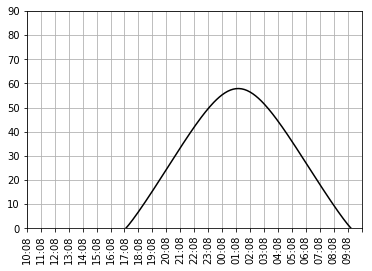

In [6]:
moon = ephem.Moon()
plotAltitude(obs, moon)

### Plotting Constellations

Plough example based on: https://github.com/skyfielders/astronomy-notebooks/blob/master/Plot.ipynb

In [8]:
#Plough example based on:
#https://github.com/skyfielders/astronomy-notebooks/blob/master/Plot.ipynb

In [9]:
from mpl_toolkits.basemap import Basemap
import matplotlib.pyplot as plt
from ipywidgets import interact, interact_manual
import numpy as np
import math

def show_map(lat_0=0,lon_0=0, width=12000000, height=8000000):
    m = Basemap(projection='aeqd', width=width, height=height,
                lat_0=lat_0, lon_0=lon_0)
    m.drawparallels(np.arange(-80,80,10))
    m.drawmeridians(np.arange(-180,180,10))

In [10]:
#Use pyephem to get the stars of the big dipper
names = ['Dubhe', 'Merak', 'Phecda', 'Megrez',
         'Alioth', 'Mizar', 'Alcor', 'Alcaid',]
stars = [ephem.star(name) for name in names]

In [11]:
#Use pyephem to plot the big dipper
def dipper_radec(year, epoch):
    for star in stars:
        star.compute(str(year), str(epoch))
    ra = [-math.degrees(star.a_ra) for star in stars]
    dec = [math.degrees(star.a_dec) for star in stars]
    return ra, dec

#Use interact to show the evolution of the big dipper over large time scale (powered by pyEphem)
@interact_manual(year=(-100000,100000,5000), epoch=(-2000,4000,1000),
         projection=['cyl','aeqd','laea','merc','stere','ortho', 'robin', 'gnom'])
def plot_dipper(year=30000, epoch=1000, projection='aeqd'):
    ra, dec = dipper_radec(year, epoch)
    width = 4000000
    m = Basemap(width=width, height=width, projection=projection,
                lat_0=dec[3], lon_0=ra[3])
    m.drawparallels(np.arange(-80,81,10))
    m.drawmeridians(np.arange(-180,180,10))
    x, y = m(ra, dec)
    m.plot(x, y, marker='o', linestyle='--', color='b')
    plt.title('date={} epoch={}'.format(year,epoch))
    

A Jupyter Widget

## `poliastro`

[`poliastro`](http://docs.poliastro.space/en/latest/index.html) astrodynamics in Python.

6650 x 46550 km x 63.4 deg orbit around Earth (♁)


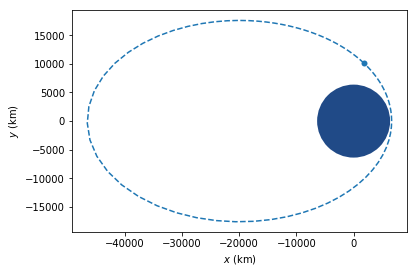

In [12]:
from poliastro.examples import molniya
from poliastro.plotting import plot

plot(molniya);
print(molniya)
#Plot of a Molniya orbit around the Earth.

In [13]:
from poliastro.plotting import plot3d
from poliastro.examples import churi

In [14]:
from IPython.display import HTML
HTML('<script type="text/javascript" src="https://cdnjs.cloudflare.com/ajax/libs/require.js/2.1.10/require.min.js"></script>')
from plotly.offline import init_notebook_mode

init_notebook_mode(connected=True)

plot3d(churi);

In [15]:
from poliastro.plotting import OrbitPlotter3D
from poliastro.examples import Orbit, Earth

frame = OrbitPlotter3D()

frame.plot(churi)
frame.plot(Orbit.from_body_ephem(Earth))

frame.show();

## `skyfield`

[`skyfield`](http://rhodesmill.org/skyfield/) is a python package for computing positions for the stars, planets, and satellites in orbit around the Earth using either geocentric coordinates or topocentric coordinates specific to your location on the Earth’s surface.

In [ ]:
from skyfield.api import load
ts = load.timescale()

planets = load('de421.bsp')
earth = planets['earth']

In [ ]:
date_utc=ts.utc(1980, 1, 1)
position = earth.at(date_utc)

print('center: ', position.center)
print('distance: ', position.distance())
print('ecliptic_latlon: ', position.ecliptic_latlon())
print('ecliptic_position: ', position.ecliptic_position())
print('from_altaz: ', position.from_altaz)
print('galactic_latlon: ', position.galactic_latlon())
print('galactic_position: ', position.galactic_position())
print('message: ', position.message)
print('observe: ', position.observe)
print('observer_data: ', position.observer_data)
print('position: ', position.position)
print('radec: ', position.radec())
print('separation from [mars]: ', position.separation_from(planets['mars'].at(date_utc)))
print('speed: ', position.speed())
print('t: ', position.t)
print('target: ', position.target)
print('velocity: ', position.velocity)

### Plotting Constellatoins Using `skyfield`


In [ ]:
#https://github.com/skyfielders/astronomy-notebooks/blob/master/Plot.ipynb
#Code updated from original demo

#Now calculate the big dipper using skyfield rather than pyEphem
import skyfield.data.hipparcos

#['Dubhe', 'Merak', 'Phecda', 'Megrez', 'Alioth', 'Mizar', 'Alcor', 'Alkaid',]
dipper_ids = [54061, 53910, 58001, 59774, 62956, 65378, 65477, 67301]
dipper_stars=[skyfield.data.hipparcos.get(str(x)) for x in dipper_ids]


In [ ]:
def skyfield_dipper(year, projection='aeqd'):
    ra = []
    dec = []
    for star in dipper_stars:
        r,d,z = earth.at(ts.utc(year, 1, 1)).observe(star).radec()
        ra.append(r._degrees)
        dec.append(d.degrees)
    width = 4000000
    m = Basemap(width=width, height=width, projection=projection,
                lat_0=dec[3], lon_0=ra[3])
    m.drawparallels(np.arange(-80,81,10))
    m.drawmeridians(np.arange(-180,180,10))
    x, y = m(ra, dec)
    m.plot(x, y, marker='o', linestyle='--', color='b')
    plt.title('date={} epoch={}'.format(year,'2000'))

In [ ]:
skyfield_dipper(2015)